# Text Analytics Project ( Beto v/s Cruz) 

##### - Avani, Apoorva, Abraham, Alyson, Jeffrey

### PART 1) Twitter Scrapping

#### 1) If you have different python versions in environment and you wish to use only a specific version (here 3.6) use <!/usr/bin/python3.6>
#### 2) If you get no module named xyz , install with <!pip install xyz>
#### 3) The tweets will be written in a file tweets.csv, we kept on changing the filenames to avoid overwriting after each pull


In [1]:
#!/usr/bin/python3.6
import oauth2 as oauth
import csv
from csv import writer
import json
import time
import urllib as urllib

### Packages for data analysis & visualization
import re
import os
import pandas as pd
%pylab inline
from matplotlib import pyplot as plt


### Packages for sentiment ananlysis

Populating the interactive namespace from numpy and matplotlib


In [2]:
## We scrapped 74 files 3000 tweets each (222000 tweets), 150,297 tweets post removing duplicates & 105,321 with legible locations

## Cleanup function
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)


## Made a Twitter Developer account to get these details 
## follow link: https://developer.twitter.com/en/docs/basics/authentication/guides/access-tokens.html
## Use your keys

api_key = "z26K7LWLroH6c4hKlzp5WjFv5"
api_secret = "cMnUTi7VzGkR7jR8vVTDpYNG99F9FnqASHC1bhNM28mlwHzGZv"
access_token_key = "308581346-TQ7ITJTWehfktqjIB5gweLhiPNSXyCBkf7j5w7g4"
access_token_secret = "GxScN1IvSjJKA5Y4NZmyDDTNA1UrJaN826ViBB4P9bzKM"

_debug=0


##Authorization
oauth_token    = oauth.Token(key=access_token_key, secret=access_token_secret)
oauth_consumer = oauth.Consumer(key=api_key, secret=api_secret)

signature_method_hmac_sha1 = oauth.SignatureMethod_HMAC_SHA1()

http_method = "GET"

http_handler  = urllib.request.HTTPHandler(debuglevel=_debug)
https_handler = urllib.request.HTTPSHandler(debuglevel=_debug)


def twitterreq(url, method, parameters):
    '''
    Construct, sign, and open a twitter request
    using the hard-coded credentials above.
    '''

    req = oauth.Request.from_consumer_and_token(oauth_consumer,
                                             token=oauth_token,
                                             http_method=http_method,
                                             http_url=url,
                                             parameters=parameters)

    req.sign_request(signature_method_hmac_sha1, oauth_consumer, oauth_token)

    headers = req.to_header()

    if http_method == "POST":
        encoded_post_data = req.to_postdata()
    else:
        encoded_post_data = None
        url = req.to_url()

    opener = urllib.request.OpenerDirector()
    opener.add_handler(http_handler)
    opener.add_handler(https_handler)

    response = opener.open(url, encoded_post_data)

    return response

#####get bandersnatch related tweets
def fetch_bandersnatch():
    #url="https://api.twitter.com/search?q=tweets.json%20bandersnatch&src=typd&lang=en"
    url = "https://api.twitter.com/1.1/search/tweets.json?q=bandersnatch&result_type=recent"
    parameters = []
    response = twitterreq(url, "GET", parameters)
    print(response)
    return response

id_list=[]
re=fetch_bandersnatch()
re_j=json.load(re)
re_j=re_j['statuses']
for a in re_j:
    id_list.append(a["id"])
print(a['text'])
##### end of bandersnatch tweet search


RT @jeoncrack: imagine bts collabed with netflix/bandersnatch creators and turned this into an interactive movie....the flavor


The above shows a tweet by a enthusiastic black mirror bandersnatch fan.

In [ ]:
#####Now get tweets about a topic of your choice

tweets_num=3000 # number of tweets we want

#####change keyword of this line; this script will fecth only 3000 tweets

##### What we did as a team was create a search list so as to search for specific terms and collate all the files into 1, 
##### remember to change the file names to avoid overwriting

parameters = []
js=[]
for i in range(tweets_num/100):
    url = "https://api.twitter.com/1.1/search/tweets.json?q='vote''for''beto'&lang=en&count=100&result_type=recent&max_id="+str(id_list[2*i])
    response = twitterreq(url, "GET", parameters)
    re_j=json.load(response)
    re_j=re_j['statuses']
    js.append(re_j)
    time.sleep(1)

ids=[]
screen_name=[]
followers=[]
listed=[]
retweet=[]
inreplyto=[]
favorite=[]
friends=[]
text=[]
location=[]

for tweets in js:
    for tweet in tweets:
    if tweet.get('user'):
        ids.append(tweet['user']['id'])
        retweet.append(tweet['retweet_count'])
        favorite.append(tweet['favorite_count'])
        inreplyto.append(tweet['in_reply_to_screen_name'])
        friends.append(tweet['user']['friends_count'])
        screen_name.append(tweet['user']['screen_name'])
        followers.append(tweet['user']['followers_count'])
        listed.append(tweet['user']['listed_count'])
        text.append(tweet['text'])
        location.append(tweet['user']['location'])
####################################################

#######output tweets file
out = open('tweets_2_1.csv','wb')
print >> out, 'ids, screen_name, followers, retweet, inreplyto, favorite, friends, listed, location, text'

rows = zip(ids, screen_name, followers, retweet, inreplyto, favorite, friends, listed, location, text)

csv = writer(out)

for row in rows:
    values = [strip_non_ascii(str(value.encode('utf8'))) if hasattr(value, 'encode') else strip_non_ascii(str(value)) for value in row]
    csv.writerow(values)
print("Written to tweets_2_3.csv in Files")  # a sample file name we used
out.close()

### PART 2) Combining all tweet files

In [8]:
import pandas as pd

In [13]:
path ='C:/Users/Avani/Downloads/Fall_Semester/Text Analytics/Text Project/Text Project/Scraped_tweets'

files_in_dir = [f for f in os.listdir(path) if f.endswith('csv')]
for filenames in files_in_dir:
   df = pd.read_csv(path +"\\" + filenames)
   df.to_csv('out.csv', mode='a')

### PART 3) Variable creation & Data Prep

In [3]:
%pylab inline
from matplotlib import pyplot as plt

### Packages for sentiment analysis
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from string import punctuation
import sys  ### module provides access to variables used by interpreter and to functions that interact strongly with interpreter
from nltk import sentiment
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

### Package for topic modelling
import gensim
from gensim import corpora, models, similarities

### Avoid warnings
import warnings
warnings.filterwarnings('ignore')

### Packages for Word Cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator




Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\Avani\Anaconda2\envs\py36\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
C:\Users\Avani\Anaconda2\envs\py36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
### installation through jupyter uncomment if needed

# !pip install vaderSentiment
# !{sys.executable} -m pip install gensim
# import pysentiment as ps
# !{sys.executable} -m pip install pysentiment
# nltk.download('vader_lexicon')

In [4]:
df = pd.read_csv(r'out.csv')
df.columns = ['Line_no','ID','Screen_Name','Followers','Retweet','InReplyTo','Favorite','Friends','Listed','Location','Text']
print(len(df.drop_duplicates()),len(df[df['Location'].notnull()].drop_duplicates()))
df_raw = df[df['Location'].notnull()].drop_duplicates()

150297 105321


#### PART 3) A. Variable Creation & cleaning tweets
#### 1. Variable for Urban/City (only for Texas)

In [5]:
### citystr has cities of texas

citystr = 'houston|austin|san antonio|dallas|fort worth|dfw|atx|hou|htx|dtx|dal|el paso|corpus christi|\
sanantonio|fortworth|elpaso|laredo|arlington|plano|corpuschristi'

def findcities(s):
    urban = 0
    s=str(s).lower()
    citiesfound = re.findall(citystr,s)
    if len(citiesfound) > 0 :
        urban = 1
    return urban

df_raw['Urban'] = 0
df_raw['Urban'] = df_raw['Location'].map(findcities)
df_raw['Urban'].sum()

14276

#### 2. Variable for Texas

In [6]:
### tx_places has cities in Texas

tx_places='houston|san antonio|dallas|austin|fort worth|el paso|arlington|corpus christi|plano|laredo|lubbock|garland|\
irving|amarillo|grand prairie|brownsville|pasadena|mckinney|mesquite|killeen|frisco|mcallen|waco|carrollton|midland|\
denton|abilene|beaumont|odessa|round rock|wichita falls|richardson|lewisville|tyler|pearland|college station|san angelo|\
allen|league city|sugar land|longview|mission|edinburg|bryan|baytown|pharr|conroe|temple|missouri city|flower mound|\
north richland hills|harlingen|victoria|new braunfels|cedar park|mansfield|rowlett|georgetown|port arthur|san marcos|\
pflugerville|euless|desoto|grapevine|galveston|bedford|cedar hill|texas city|wylie|haltom city|keller|rockwall|burleson|\
coppell|huntsville|duncanville|the colony|sherman|hurst|lancaster|friendswood|texarkana|weslaco|lufkin|schertz|san juan|\
del rio|la porte|nacogdoches|deer park|rosenberg|copperas cove|little elm|socorro|kyle|leander|farmers branch|waxahachie|\
cleburne|southlake|houston|austin|san antonio|dallas|fort worth|dfw|atx|hou|htx|dtx|dal|el paso|corpus christi|\
sanantonio|fortworth|elpaso|laredo|arlington|plano|corpuschristi'
def findtx(s):
    intexas = 0
    s=str(s).lower()
    tx1 = re.findall('tx',s)
    tx2 = re.findall('texas',s)
    allplacesfound = re.findall(tx_places,s)
    if len(tx1)>0 or len(tx2)>0 or len(allplacesfound)>0:
        intexas = 1 
    return intexas

df_raw['Texas'] = 0
df_raw['Texas'] = df_raw['Location'].map(findtx)
df_raw['Texas'].sum()

30952

#### 3. Variables for Candidates

In [7]:
### creating variable for Beto/Ted with different variation in mentions
### Almost equal-equal split for Beto & Ted

tedcruz_names='ted cruz|ted|cruz|tedcruz'
beto_names='beto orourke|beto|orourke|betoorourke|rourke'


def findbeto(s):
    beto = 0
    s = str(s).lower()
    txt1 = re.findall(beto_names,s)
    
    if len(txt1) > 0:
        beto = 1
    return beto

df_raw['Beto'] = df_raw['Text'].map(findbeto)

def findcruz(s):
    cruz = 0
    s = str(s).lower()
    txt1 = re.findall(tedcruz_names,s)
    if len(txt1) > 0:
        cruz = 1
    return cruz

df_raw['Cruz'] = df_raw['Text'].map(findcruz)
print (df_raw['Beto'].sum())
print (df_raw['Cruz'].sum())

61016
60398


#### PART 3) B. Clean tweets

In [8]:
def processTweet(tweet):
    
    if tweet.startswith("RT"):
        i = tweet.index(':')
        tweet = tweet[i+2:]
    
    tweet = tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    tweet = re.sub('([0-9]+)','', tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('&amp;', '', tweet)
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    tweet = tweet.strip('\'"')
    return tweet

df_raw['Text']=df_raw['Text'].map(processTweet)

### PART 4) Sentiment analysis
#### 1. Overal Sentiment Score for each tweet in Score Column

In [23]:
#Returns compound sentiment score between -1 and 1
def getScores(s):
    score = SentimentIntensityAnalyzer().polarity_scores(s)
    return score['compound']

df_raw['Score'] = df_raw['Text'].map(getScores)
dftx = df_raw[df_raw['Texas']==1]
dftx.head()

#### 2. Word Clouds
### Beto Word Cloud

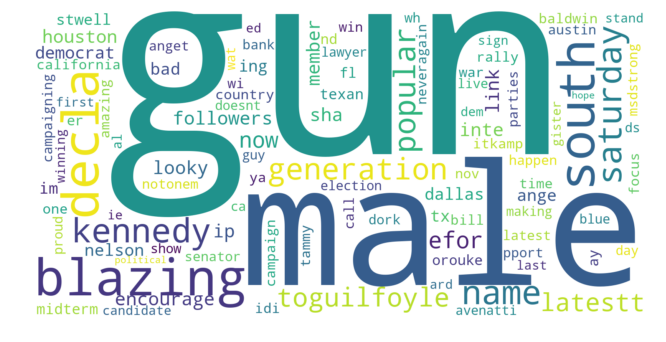

In [26]:
beto=df_raw[(df_raw.Beto==1) & (df_raw.Cruz==0)]['Text'].str.cat(sep='').replace("'","")

### removing inconsequential words from the cloud by trial & error

for i in ['nasty','ch','su','came','put','dont','od','vot','make','re','ee','need','go','beto','cruz','texas','ted','vote','man','senate','o rourke','want','rourke','orourke','he','o ','please','support','people','county','will','new']:
    beto=beto.replace(i," ")
wordcloud = WordCloud(width=1600, height=800,max_font_size=1000, max_words=100, background_color="white",collocations=False).generate(beto)
plt.figure(figsize=(11,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


### Ted Cruz WordCloud

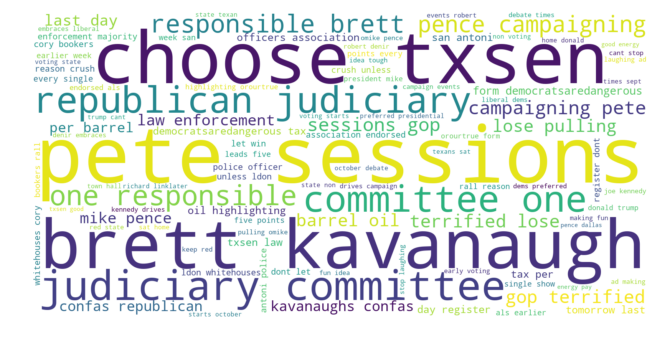

In [28]:
text_cruz=df_raw[df_raw.Cruz==1]['Text'].str.cat(sep='').replace("'","")

### removing inconsequential words from the cloud by trial & error

for i in ['beto','cruz','texas','ted','vote','man','senate','o rourke','want','rourke','orourke','he','o ','please','support','people','county','will','new']:
    text_cruz=text_cruz.replace(i," ")
wordcloud = WordCloud(width=1600, height=800,max_font_size=1000, max_words=100, background_color="white").generate(text_cruz)
plt.figure(figsize=(11,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


#### 4. Positive Word lifts for both candidates

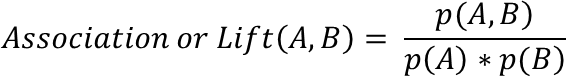

##### product of no. of places where both A & B occur simultaneously and number of documents divided by number of occurence of A & B (there is product due to probability in formula
### Beto & Positive Sentiment

In [32]:
### Filtering tweets with only Beto (Cruz variable = 0) with positive score
BPO=pd.DataFrame(df_raw[(df_raw['Beto']==1) & (df_raw['Score']>0) & (df_raw['Cruz']==0)]['Text'])

### Concatenating positive text for Beto post cleaning
s=BPO['Text'].str.cat(sep=' ')

from string import punctuation

for p in punctuation:
    s =s.replace(p,'')
s =re.sub('[0-9]+','',s)
words =re.findall('\w+',s)

stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in words if not w in stop_words]

### Counting each word and sorting by maximum occurence

from collections import Counter 
BDF=pd.DataFrame.from_dict(Counter(filtered_sentence),orient='index').reset_index().sort_values(by=0, ascending=False)[:50]

### Intermediate dataframe to work on
df_rawi=df_raw

### Collected words with positive connotation to get lift

list_good_words=['good','blazing','rain','save','energy','responsible']

def findword(s):
    beto = 0
    s = str(s).lower()
    txt1 = re.findall('good',s)
    if len(txt1) > 0:
        beto = 1
    return beto


### Change word from list of good words ['good','blazing','rain','save','energy','responsible'] here (good)

df_rawi['good'] = df_rawi['Text'].map(findword)
prbeto = df_rawi['Beto'].mean()
prword = df_rawi['good'].mean()
betoword = df_rawi[df_rawi['Beto']==1]['good'].sum()
prbetoword = betoword/len(df_rawi)

lift_betoword = prbetoword /(prbeto*prword)
lift_betoword

1.6119196434085725

### Lift Score for positive words Beto

Good = 1.61 || Blazing = 1.78 || Rain = 1.71 || Save=1.28 || energy=1.05 || responsible=0.0008

### Ted & Positive Sentiment

In [33]:
### Filtering tweets with only Ted (Beto variable = 0) with positive score
TPO=pd.DataFrame(df_raw[(df_raw['Beto']==0) & (df_raw['Score']>0) & (df_raw['Cruz']==1)]['Text'])

### Concatenating positive text for Beto post cleaning
s=TPO['Text'].str.cat(sep=' ')

from string import punctuation

for p in punctuation:
    s =s.replace(p,'')
s =re.sub('[0-9]+','',s)
words =re.findall('\w+',s)

filtered_sentence = [w for w in words if not w in stop_words]

### Counting each word and sorting by maximum occurence
TDF=pd.DataFrame.from_dict(Counter(filtered_sentence),orient='index').reset_index().sort_values(by=0, ascending=False)[:80]

### Collected words with positive connotation to get lift

list_good_words=['responsible','liberty','laughing','omg','energy','amazing','passion']

def findword(s):
    beto = 0
    s = str(s).lower()
    txt1 = re.findall('laughing',s)
    if len(txt1) > 0:
        beto = 1
    return beto


### Change word from list of good words ['good','blazing','rain','save','energy','responsible'] here (good)

change_word='responsible'

df_rawi[change_word] = df_rawi['Text'].map(findword)
prcruz = df_rawi['Cruz'].mean()
prword = df_rawi[change_word].mean()
cruzword = df_rawi[df_rawi['Cruz']==1][change_word].sum()
prcruzword = cruzword/len(df_rawi)

lift_cruzword = prcruzword /(prcruz*prword)
lift_cruzword

1.7437829067187656

### Lift Score for positive words Ted Cruz

Good = 0.27 || energy = 1.87 || amazing = 0.757 || omg=1.93 || responsible=1.74 || liberty=1.94 || passion=1.87 || laughing = 1.9457

#### 5. Split up of Positive, Negative & Neutral sentiment tweets
### Positive, Negative & Neutral tweets split up for Beto & Ted Cruz

In [53]:
### Overall Split-up

def bucketing(score):
    if score>0.05:
        return 'Positive'
    elif score<-0.05:
        return 'Negative'
    else:
        return 'Neutral'
df_rawB=df_raw[df_raw['Beto']==1]
df_rawB['ScoreBucket']=df_rawB['Score'].map(bucketing)
print ("Overall Split-up \n \n","For Beto \n\n", pd.DataFrame(df_rawB['ScoreBucket'].value_counts()/len(df_rawB)*100),"\n")

df_rawT=df_raw[df_raw['Cruz']==1]
df_rawT['ScoreBucket']=df_rawT['Score'].map(bucketing)
print ("For Ted Cruz \n\n", pd.DataFrame(df_rawT['ScoreBucket'].value_counts()/len(df_rawT)*100),"\n\n")

### Texas only Split-up

df_rawBT=df_rawB[df_rawB['Texas']==1]
df_rawBT['ScoreBucket']=df_rawBT['Score'].map(bucketing)
print("Texas only Split-up \n \n","For Beto \n \n",pd.DataFrame(df_rawBT['ScoreBucket'].value_counts()/len(df_rawBT)*100),"\n")

df_rawTT=df_rawT[df_rawT['Texas']==1]
df_rawTT['ScoreBucket']=df_rawT['Score'].map(bucketing)
print("For Ted \n \n",pd.DataFrame(df_rawTT['ScoreBucket'].value_counts()/len(df_rawTT)*100),"\n")

### Texas Urban Split-up

df_rawBU=df_rawB[df_rawB['Urban']==1]
df_rawBU['ScoreBucket']=df_rawBU['Score'].map(bucketing)
print("Texas Urban Split-up \n \n","For Beto \n \n",pd.DataFrame(df_rawBU['ScoreBucket'].value_counts()/len(df_rawBU)*100),"\n")

df_rawTU=df_rawT[df_rawT['Urban']==1]
df_rawTU['ScoreBucket']=df_rawTU['Score'].map(bucketing)
print("For Ted \n \n",pd.DataFrame(df_rawTU['ScoreBucket'].value_counts()/len(df_rawTU)*100),"\n")

### Texas Rural Split-up

df_rawBR=df_rawB[df_rawB['Urban']==0]
df_rawBR['ScoreBucket']=df_rawBR['Score'].map(bucketing)
print("Texas Rural Split-up \n \n","For Beto \n \n",pd.DataFrame(df_rawBR['ScoreBucket'].value_counts()/len(df_rawBR)*100),"\n")

df_rawTR=df_rawT[df_rawT['Urban']==0]
df_rawTR['ScoreBucket']=df_rawTR['Score'].map(bucketing)
print("For Ted \n \n",pd.DataFrame(df_rawTR['ScoreBucket'].value_counts()/len(df_rawTR)*100),"\n")

Overall Split-up 
 
 For Beto 

           ScoreBucket
Positive    56.449128
Neutral     24.078930
Negative    19.471942 

For Ted Cruz 

           ScoreBucket
Positive    47.258187
Negative    27.893308
Neutral     24.848505 


Texas only Split-up 
 
 For Beto 
 
           ScoreBucket
Positive    53.947443
Neutral     26.289801
Negative    19.762756 

For Ted 
 
           ScoreBucket
Positive    48.241439
Neutral     27.550784
Negative    24.207777 

Texas Urban Split-up 
 
 For Beto 
 
           ScoreBucket
Positive    55.817210
Neutral     26.794807
Negative    17.387984 

For Ted 
 
           ScoreBucket
Positive    45.724756
Neutral     29.234528
Negative    25.040717 

Texas Rural Split-up 
 
 For Beto 
 
           ScoreBucket
Positive    56.542513
Neutral     23.677577
Negative    19.779910 

For Ted 
 
           ScoreBucket
Positive    47.471243
Negative    28.289647
Neutral     24.239110 



#### 6. Graph Codes for sentiment spreads

Nationwide Beto Sentiment:  0.1821800757178445
Nationwide Cruz Sentiment:  0.1051053677274082
Texas Beto Sentiment:  0.1702245700664056
Texas Cruz Sentiment:  0.13696926291352293
Texas Urban Beto Sentiment:  0.17390148930753568
Texas Urban Cruz Sentiment:  0.11369315960912053
Rural Texas Beto Sentiment:  0.16726586090341083
Rural Texas Cruz Sentiment:  0.15435907523828835


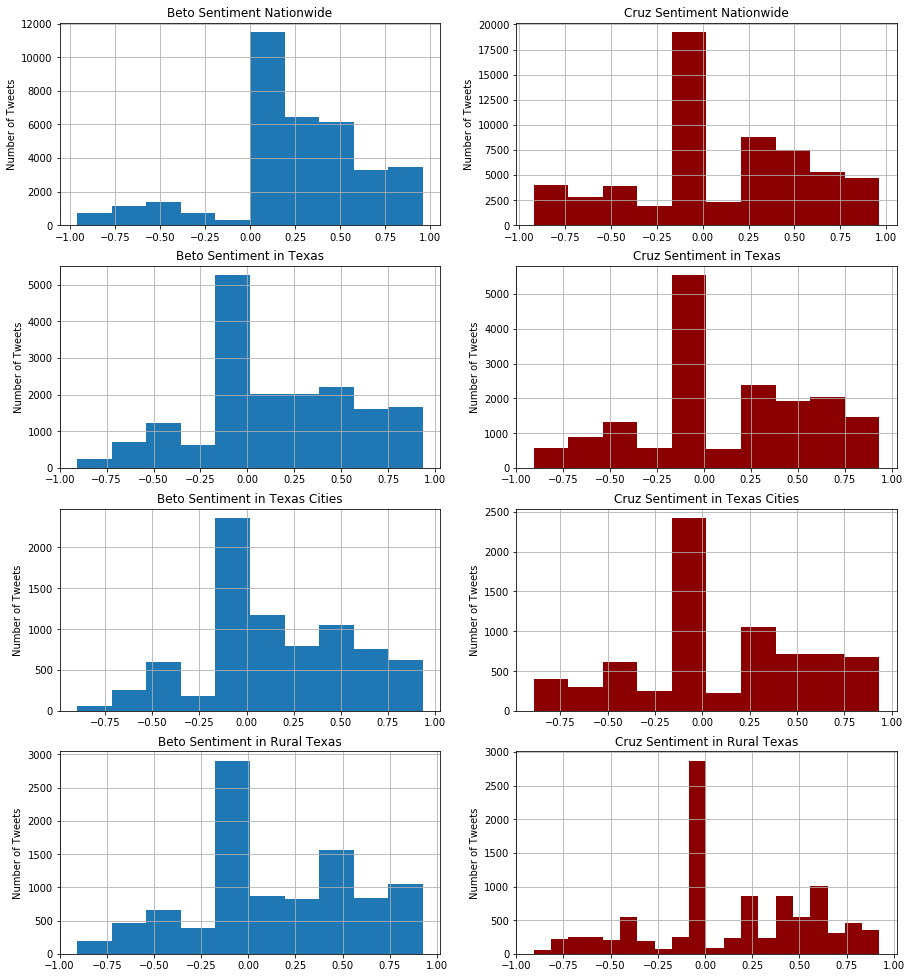

In [113]:
#Beto Sentiment Nationwide

plt.figure(figsize=(15,35))

plt.subplot(821)
df_raw[(df_raw['Beto']==1) & (df_raw['Cruz']==0)]['Score'].hist(bins=10)
plt.title('Beto Sentiment Nationwide')
plt.ylabel('Number of Tweets')
senti_betonation = df_raw[df_raw['Beto']==1]['Score'].mean()
print('Nationwide Beto Sentiment: ', senti_betonation)

#Cruz Sentiment Nationwide

plt.subplot(822)
df_raw[df_raw['Cruz']==1]['Score'].hist(bins=10, color='darkred')
plt.title('Cruz Sentiment Nationwide')
plt.ylabel('Number of Tweets')
senti_cruznation = df_raw[df_raw['Cruz']==1]['Score'].mean()
print('Nationwide Cruz Sentiment: ', senti_cruznation)

#Beto Sentiment in Texas

plt.subplot(823)
dftx[dftx['Beto']==1]['Score'].hist(bins=10)
plt.title('Beto Sentiment in Texas')
plt.ylabel('Number of Tweets')
senti_betotexas = dftx[dftx['Beto']==1]['Score'].mean()
print('Texas Beto Sentiment: ', senti_betotexas)

#Cruz Sentiment in Texas

plt.subplot(824)
dftx[dftx['Cruz']==1]['Score'].hist(bins=10, color='darkred')
plt.title('Cruz Sentiment in Texas')
plt.ylabel('Number of Tweets')
senti_cruztexas = dftx[dftx['Cruz']==1]['Score'].mean()
print('Texas Cruz Sentiment: ', senti_cruztexas)

#Beto Sentiment in Texas Cities

plt.subplot(825)
dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==1)]['Score'].hist(bins=10)
plt.title('Beto Sentiment in Texas Cities')
plt.ylabel('Number of Tweets')
senti_betotxurban = dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==1)]['Score'].mean()
print('Texas Urban Beto Sentiment: ', senti_betotxurban)

#Cruz Sentiment in Texas Cities

plt.subplot(826)
dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Score'].hist(bins=10, color='darkred')
plt.title('Cruz Sentiment in Texas Cities')
plt.ylabel('Number of Tweets')
senti_cruztxurban = dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Score'].mean()
print('Texas Urban Cruz Sentiment: ', senti_cruztxurban)

# print (dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Location'].value_counts())


#Beto Sentiment in Rural Texas

plt.subplot(827)
dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==0)]['Score'].hist(bins=10)
plt.title('Beto Sentiment in Rural Texas')
plt.ylabel('Number of Tweets')
senti_betotxrural = dftx.loc[(dftx['Beto']==1) & (dftx['Urban']==0)]['Score'].mean()
print('Rural Texas Beto Sentiment: ', senti_betotxrural)

#Cruz Sentiment in Rural Texas

plt.subplot(828)
dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==0)]['Score'].hist(bins=20, color='darkred')
plt.title('Cruz Sentiment in Rural Texas')
plt.ylabel('Number of Tweets')
senti_cruztxrural = dftx.loc[(dftx['Cruz']==1) & (dftx['Urban']==0)]['Score'].mean()
print('Rural Texas Cruz Sentiment: ', senti_cruztxrural)

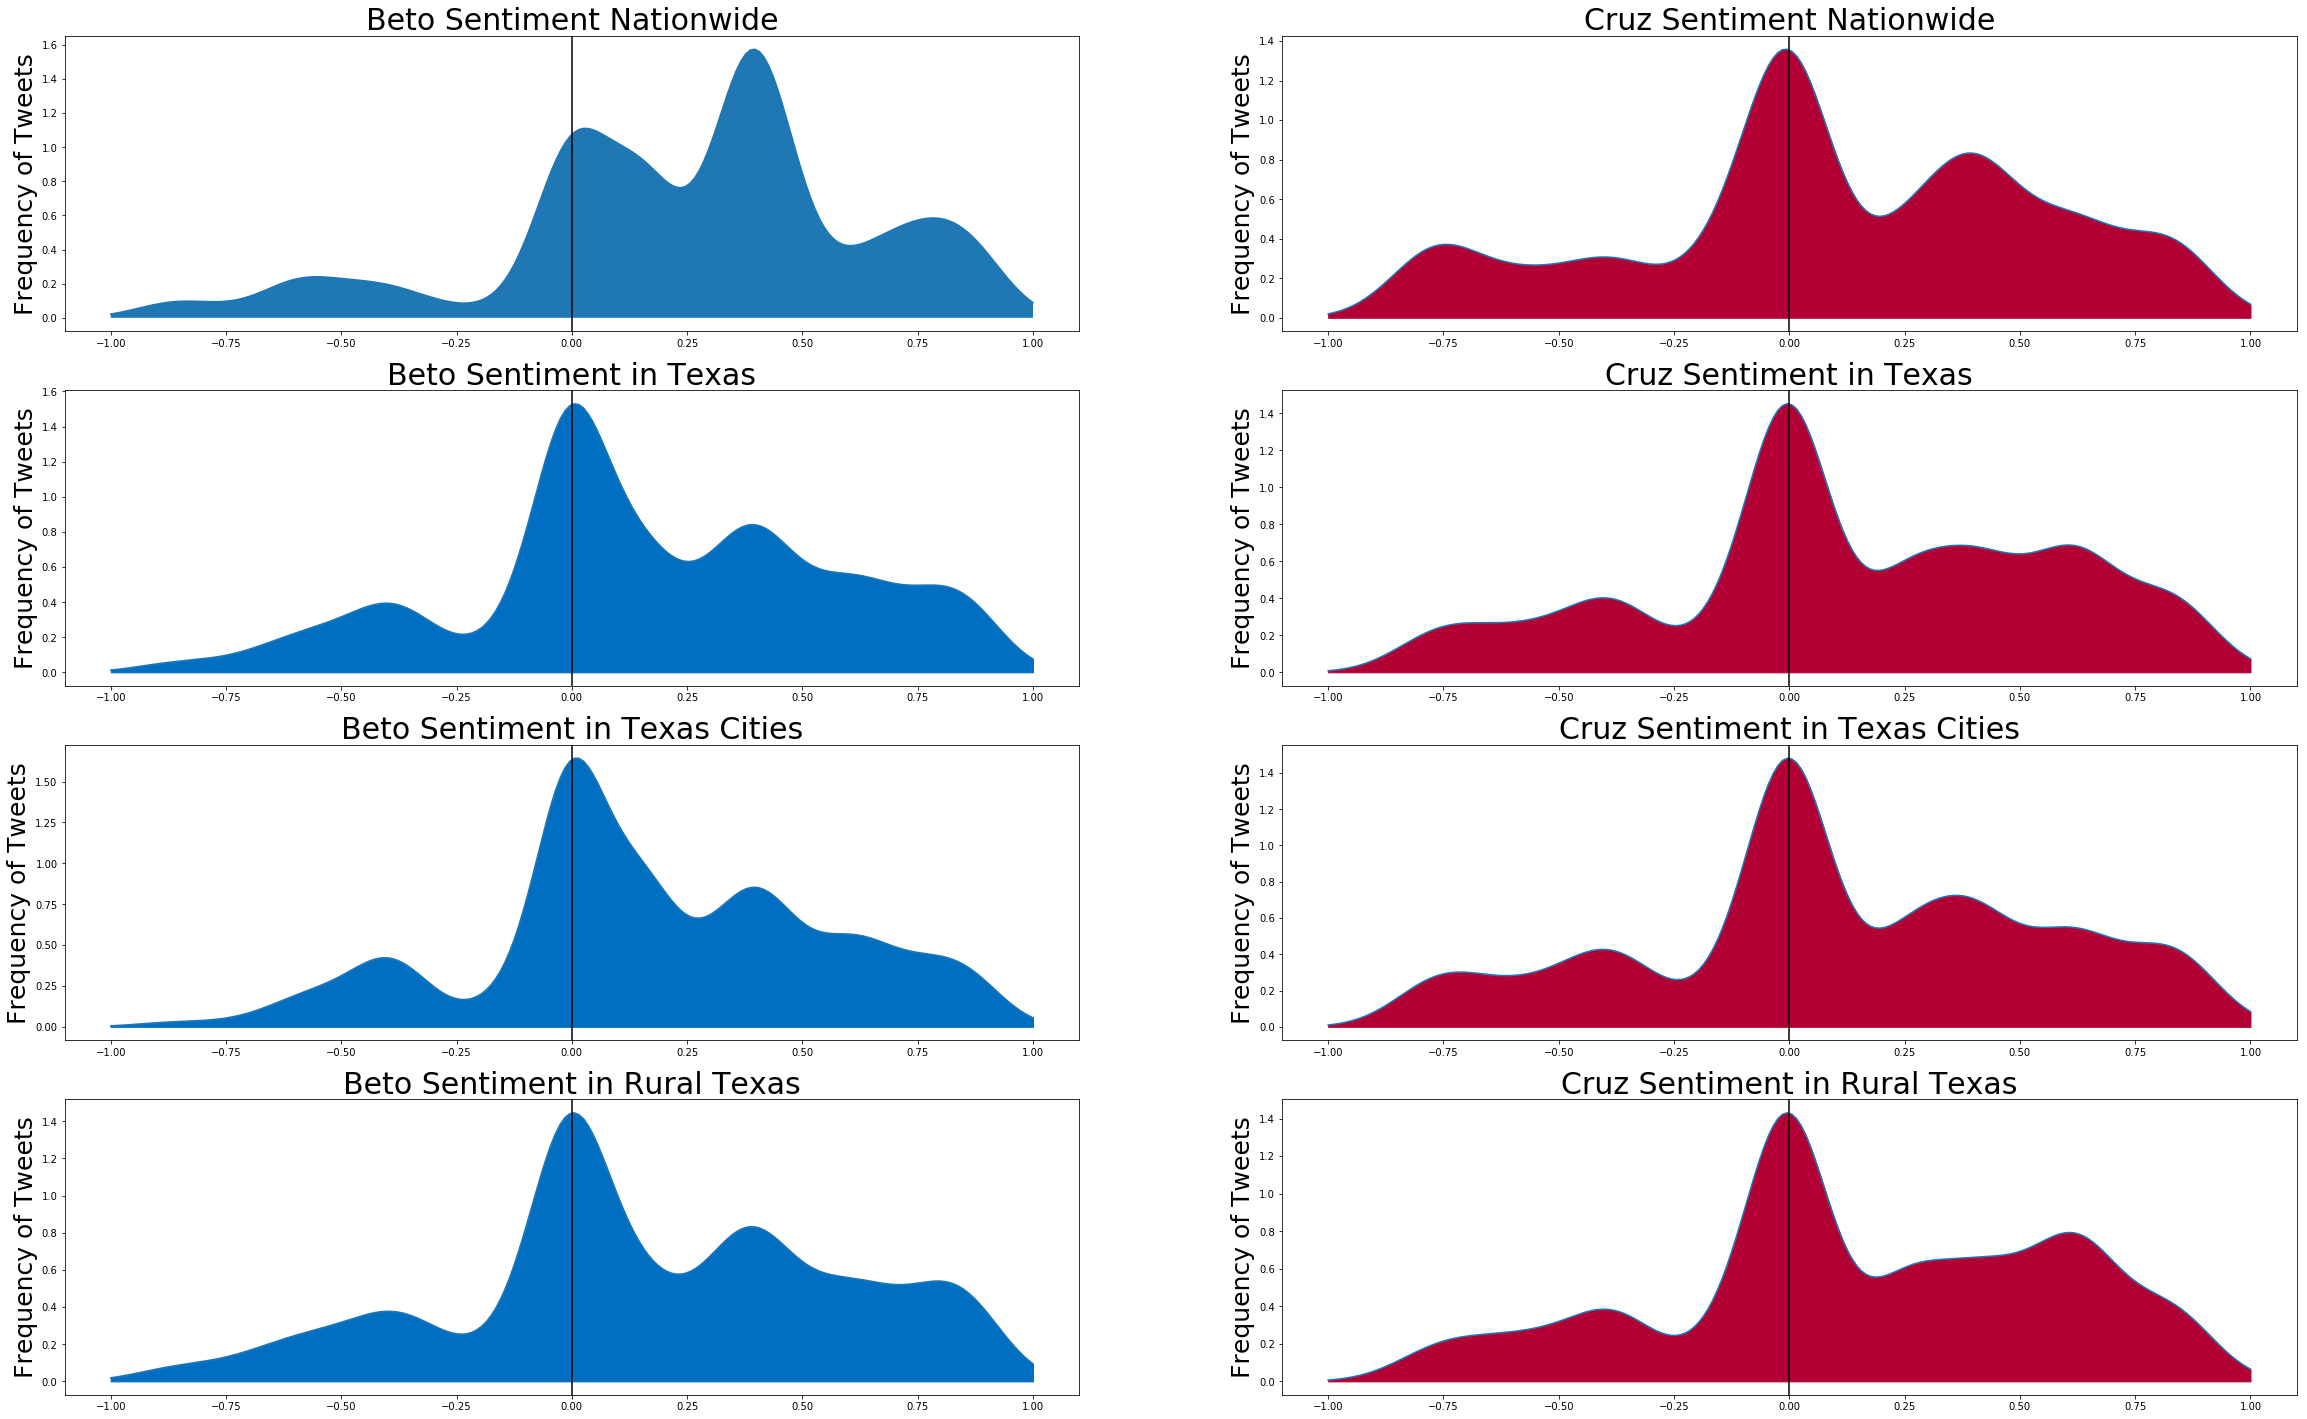

In [181]:
import numpy as np
fix,ax = plt.subplots(4,2,figsize=(40,25))

#Beto Sentiment Nationwide

from scipy.stats import gaussian_kde
data = df_raw[(df_raw['Beto']==1) & (df_raw['Cruz']==0)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
ax[0,0].plot(xs,density(xs))
ax[0,0].set_title('Beto Sentiment Nationwide', size=30)
ax[0,0].set_ylabel('Frequency of Tweets', size=25)
ax[0,0].fill_between(xs,density(xs))
ax[0,0].axvline(x=0, color='black')


#Cruz Sentiment Nationwide

data = df_raw[df_raw['Cruz']==1]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
ax[0,1].plot(xs,density(xs))
ax[0,1].set_title('Cruz Sentiment Nationwide', size=30)
ax[0,1].set_ylabel('Frequency of Tweets', size=25)
ax[0,1].fill_between(xs,density(xs),color='#b20035')
ax[0,1].axvline(x=0, color='black')

#Beto Sentiment in Texas

data = dftx[dftx['Beto']==1]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
ax[1,0].plot(xs,density(xs))
ax[1,0].set_title('Beto Sentiment in Texas', size=30)
ax[1,0].set_ylabel('Frequency of Tweets', size=25)
ax[1,0].fill_between(xs,density(xs),color='#006fc2')
ax[1,0].axvline(x=0, color='black')

#Cruz Sentiment in Texas

data = dftx[dftx['Cruz']==1]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
ax[1,1].plot(xs,density(xs))
ax[1,1].set_title('Cruz Sentiment in Texas', size=30)
ax[1,1].set_ylabel('Frequency of Tweets', size=25)
ax[1,1].fill_between(xs,density(xs),color='#b20035')
ax[1,1].axvline(x=0, color='black')

#Beto Sentiment in Texas Cities

data = dftx[(dftx['Beto']==1) & (dftx['Urban']==1)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
ax[2,0].plot(xs,density(xs))
ax[2,0].set_title('Beto Sentiment in Texas Cities', size=30)
ax[2,0].set_ylabel('Frequency of Tweets', size=25)
ax[2,0].fill_between(xs,density(xs),color='#006fc2')
ax[2,0].axvline(x=0, color='black')

#Cruz Sentiment in Texas Cities

data = dftx[(dftx['Cruz']==1) & (dftx['Urban']==1)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
ax[2,1].plot(xs,density(xs))
ax[2,1].set_title('Cruz Sentiment in Texas Cities', size=30)
ax[2,1].set_ylabel('Frequency of Tweets', size=25)
ax[2,1].fill_between(xs,density(xs),color='#b20035')
ax[2,1].axvline(x=0, color='black')

#Beto Sentiment in Rural Texas

data = dftx[(dftx['Beto']==1) & (dftx['Urban']==0)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
ax[3,0].plot(xs,density(xs))
ax[3,0].set_title('Beto Sentiment in Rural Texas', size=30)
ax[3,0].set_ylabel('Frequency of Tweets', size=25)
ax[3,0].fill_between(xs,density(xs),color='#006fc2')
ax[3,0].axvline(x=0, color='black')

#Cruz Sentiment in Rural Texas

data = dftx[(dftx['Cruz']==1) & (dftx['Urban']==0)]['Score']
density = gaussian_kde(data)
xs = np.linspace(-1,1,200)
density.covariance_factor = lambda : .20
density._compute_covariance()
ax[3,1].plot(xs,density(xs))
ax[3,1].set_title('Cruz Sentiment in Rural Texas', size=30)
ax[3,1].set_ylabel('Frequency of Tweets', size=25)
ax[3,1].fill_between(xs,density(xs),color='#b20035')
ax[3,1].axvline(x=0, color='black')


#### 7. Lift in Texas (urban vs rural for Beto & Cruz)

In [183]:
### Here we calculate probabilities

prcruz = dftx['Cruz'].mean()
prbeto = dftx['Beto'].mean()
prcity = dftx['Urban'].mean() #About 52% urban

#Lift Cruz and City
cruzcity = dftx[dftx['Cruz']==1]['Urban'].sum()
prcruzcity = cruzcity/len(dftx)
lift_cruzcity = prcruzcity/(prcruz*prcity)
lift_cruzcity

#Lift Cruz and Rural
cruzrural = len(dftx[dftx['Cruz']==1]['Urban']) - cruzcity
prcruzrural = cruzrural/len(dftx)
lift_cruzrural = prcruzrural/(prcruz*(1-prcity))
lift_cruzrural

#Lift Beto and City
betocity = dftx[dftx['Beto']==1]['Urban'].sum()
prbetocity = betocity/len(dftx)
lift_betocity = prbetocity/(prbeto*prcity)
lift_betocity

#Lift Beto and Rural
betorural = len(dftx[dftx['Beto']==1]['Urban']) - betocity
prbetorural = betorural/len(dftx)
lift_betorural = prbetorural/(prbeto*(1-prcity))
lift_betorural

print ("Lift for Beto in Urban Areas : ",round(lift_betocity,2),"\t\t","Lift for Cruz in Urban Areas : ",round(lift_cruzcity,2),"\n",
      "Lift for Beto in Rural Areas : ",round(lift_betorural,2),"\t\t","Lift for Cruz in Rural Areas : ",round(lift_cruzrural,2),"\n")

Lift for Beto in Urban Areas :  0.97 		 Lift for Cruz in Urban Areas :  0.93 
 Lift for Beto in Rural Areas :  1.03 		 Lift for Cruz in Rural Areas :  1.06 



### PART 5) Beto & Ted Cruz Topics (Topic Modelling)

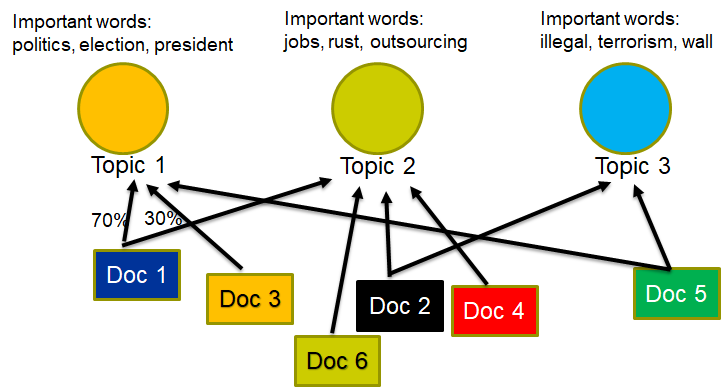

#### There are two approaches one is using count of words, other is using TF-IDF measure

### 5.1 Count of words

In [47]:
### Used spacy here in place of NLTK as it can be scaled better. It's written on OOPS. Can be used in word to vec applications.
### Generally we use it for Deep Learning applications

### Packages for topic modelling
import spacy
from spacy.lang.en import English
parser = English()
import nltk
### getting roots, synonyms, antonyms of words
nltk.download('wordnet')

### used to clean our text & return a list of tokens

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

### gets different forms of words synonyms, antonyms

from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
### wn.morphy?    
### Find a possible base form for the given form, with the given
### part of speech, by checking WordNet's list of exceptional
### forms, and by recursively stripping affixes for this part of
### speech until a form in WordNet is found
  
### lemmetizes the words
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

for w in ['dogs', 'ran', 'discouraged']:
    print(w, get_lemma(w), get_lemma2(w))
    
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    tokens = [get_lemma2(token) for token in tokens]
    return tokens

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
dogs dog dog
ran run ran
discouraged discourage discouraged
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
text_data = []
df_rawi=pd.DataFrame(df_raw[df_raw['Cruz']==1][['Text','ID']]).drop_duplicates()
for line in df_rawi['Text']:
    tokens = prepare_text_for_lda(line)
    text_data.append(tokens)
print(tokens)

['president', 'penny', 'tout', 'sessions', 'dallas', 'campaign', 'swing']


In [48]:
### creating a dictionary from the data, 
from gensim import corpora
dictionary = corpora.Dictionary(text_data)

### then convert to bag-of-words corpus 
corpus = [dictionary.doc2bow(text) for text in text_data]

### and save the dictionary and corpus for future use
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

import gensim
NUM_TOPICS = 5

### Train and use Online Latent Dirichlet Allocation (OLDA) models as presented in
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

topics = pd.DataFrame(ldamodel.print_topics())


In [49]:
topics.head(5)

,0,1
0,0,"0.075*""texas"" + 0.057*""barrel"" + 0.029*""texan""..."
1,1,"0.064*""senate"" + 0.045*""orourke"" + 0.041*""peop..."
2,2,"0.100*""o'rourke"" + 0.089*""texas"" + 0.068*""supp..."
3,3,"0.060*""texas"" + 0.043*""voter"" + 0.036*""please""..."
4,4,"0.072*""sessions"" + 0.072*""penny"" + 0.067*""dall..."


In [50]:
ldamodel.get_topics().T

array([[1.3559311e-02, 7.0309175e-06, 8.7126464e-06, 5.1894281e-06,
        9.2142482e-06],
       [1.7367433e-04, 6.8671879e-06, 8.8108791e-06, 5.2080823e-06,
        9.2140144e-06],
       [4.5783077e-03, 6.7628002e-06, 8.7957296e-06, 6.0307658e-03,
        9.4159413e-06],
       ...,
       [9.4221068e-06, 6.7050396e-06, 8.7153740e-06, 5.3313370e-06,
        3.4735832e-04],
       [9.4221068e-06, 6.7050396e-06, 8.7153740e-06, 5.3313370e-06,
        3.4735832e-04],
       [8.9444693e-06, 6.7045016e-06, 8.7141325e-06, 5.3415129e-06,
        3.4783289e-04]], dtype=float32)

In [51]:
tweets_lda_results=[]
for i in range(len(corpus)):
    tweets_lda=(sorted(ldamodel[corpus[i]], key=lambda tup: -1*tup[1])[0][0])
    tweets_lda_results.append(tweets_lda)
tweets_lda_series=pd.Series(tweets_lda_results,index=df_rawi.index.values)

words_dic=[]
for i in range(len(dictionary)):
    words_dic_i=dictionary[dictionary.keys()[i]]
    words_dic.append(words_dic_i)
    
#lda loadings of cruz tweets
lda_cruz_df=pd.DataFrame(ldamodel.get_topics().T,columns=[0,1,2,3,4])
lda_cruz_df['words_dic']=pd.Series(words_dic)
lda_cruz_df.set_index('words_dic',inplace=True)
lda_cruz_df.to_csv('lda_cruz_2.csv', mode='a')
lda_cruz_df.head(10)

,0,1,2,3,4
words_dic,,,,,
blackburn,0.013559,0.000007,0.000009,0.000005,0.000009
either,0.000174,0.000007,0.000009,0.000005,0.000009
elect,0.004578,0.000007,0.000009,0.006031,0.000009
people,0.000009,0.041132,0.000009,0.000005,0.000009
district,0.000754,0.000007,0.000009,0.000005,0.000009
francis,0.001056,0.000007,0.000009,0.000005,0.000009
o'rourke,0.000009,0.000007,0.100279,0.000005,0.015454
property,0.000009,0.000007,0.000009,0.000005,0.000020
raise,0.000009,0.000007,0.000009,0.000005,0.006421


### Here are the topics that seemed evident post topic modelling:

##### Overall:
###### Democratic Rallies, Trump Jr. Guilfoyle connect, Topic 3 & 4 revolved around Beto while Topic 5 was only Ted Cruz oriented

##### Beto:
###### University appeal, Charity, Dreamers Propoganda / Immigration issue,	Wind of Change,	LiveStreamedVideoDiscussion (whataburger)

##### Cruz:
###### Attacking Beto's Hollywood support, Attacking Beto's Digital campaign, Incumbent support	Anti-Immigrant, Targeting major cities (weak support)


### 5.2 TF-IDF meausre

### Ted Cruz Topics

In [9]:
import os, csv, lda, nltk
import pandas as pd
import numpy as np
from nltk.tokenize import PunktSentenceTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy import sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
### Stemming algorithms written by some programmer
stemmer = SnowballStemmer('english')

In [49]:
# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
### gensim.utils.simple_preprocess = Convert document into list of lowercase tokens, ignore tokens that are too short or too long
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
        result = [get_lemma(token) for token in result]
        result = [get_lemma2(token) for token in result]
    return result
print (len(dftx))
cruztweets = pd.DataFrame(dftx[dftx['Cruz']==1][['Text','ID']]).drop_duplicates()
cruztweets = cruztweets['Text']
print (len(cruztweets))
cruzwords = cruztweets.map(preprocess)

30952
5274


In [50]:
### checking lda topics for 1 tweet
### Dictionary encapsulates the mapping between normalized words and their integer ids.

### Creating dictionary
cruz_dt = gensim.corpora.Dictionary(cruzwords)

### getting bag of words
cruz_bow = [cruz_dt.doc2bow(tweet) for tweet in cruzwords]
bow_tweet_1 = cruz_bow[0]

#Print sample breakdown
for i in range(len(bow_tweet_1)):
    print("Word {} (\"{}\") appears {} time.".format(bow_tweet_1[i][0], 
                                                     cruz_dt[bow_tweet_1[i][0]], 
                                                     bow_tweet_1[i][1]))

Word 0 ("district") appears 1 time.
Word 1 ("francis") appears 1 time.
Word 2 ("liar") appears 1 time.
Word 3 ("property") appears 1 time.
Word 4 ("raise") appears 2 time.
Word 5 ("rourke") appears 1 time.
Word 6 ("tax") appears 1 time.
Word 7 ("time") appears 2 time.
Word 8 ("vote") appears 1 time.
Word 9 ("zero") appears 1 time.


In [52]:
### Objects of this class realize the transformation between word-document co-occurrence matrix (int)
### into a locally/globally weighted TF-IDF matrix (positive floats)

cruz_tfidf = models.TfidfModel(cruz_bow)
cruz_model = cruz_tfidf[cruz_bow]

### An optimized implementation of the LDA algorithm, able to harness the power of multicore CPUs.
### Follows the similar API as the parent class :class:`~gensim.models.ldamodel.LdaModel`
lda_cruz = gensim.models.LdaMulticore(cruz_model, num_topics=5, id2word=cruz_dt, passes=2, workers=4)

In [53]:
df_cruztopics = pd.DataFrame(lda_cruz.print_topics(5))
df_cruztopics

,0,1
0,0,"0.042*""vote"" + 0.025*""cruz"" + 0.014*""pulling"" ..."
1,1,"0.024*""state"" + 0.023*""vote"" + 0.021*""barrel"" ..."
2,2,"0.023*""dont"" + 0.020*""vote"" + 0.020*""register""..."
3,3,"0.020*""rourke"" + 0.017*""news"" + 0.017*""battleg..."
4,4,"0.044*""support"" + 0.035*""txsen"" + 0.034*""choos..."


In [54]:
### topic belonging & maxium score words for a tweet line (0)
for index, score in sorted(lda_cruz[bow_tweet_1], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_cruz.print_topic(index, 2)))


Score: 0.48223817348480225	 
Topic: 0.023*"dont" + 0.020*"vote"

Score: 0.36175817251205444	 
Topic: 0.044*"support" + 0.035*"txsen"

Score: 0.12450334429740906	 
Topic: 0.042*"vote" + 0.025*"cruz"

Score: 0.015755202621221542	 
Topic: 0.020*"rourke" + 0.017*"news"

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"


In [55]:
### lda  topics on all the tweets
cruztweets_lda_results=[]
for i in range(len(cruz_bow)):
    cruztweets_lda=(sorted(lda_cruz[cruz_bow[i]], key=lambda tup: -1*tup[1])[0][0])
    cruztweets_lda_results.append(cruztweets_lda)
    print (sorted(lda_cruz[cruz_bow[i]], key=lambda tup: -1*tup[1])[0][0])
    print("\nScore: {}\t \nTopic: {}".format(score, lda_cruz.print_topic(1, 2)))
cruztweets_lda_series=pd.Series(cruztweets_lda_results,index=cruztweets.index.values)

2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
T

Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
1

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
0

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
4

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
3

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote"
2

Score: 0.015745077282190323	 
Topic: 0.024*"state" + 0.023*"vote

In [56]:
words_dic3=[]
for i in range(len(cruz_dt)):
    words_dic2=cruz_dt[cruz_dt.keys()[i]]
    words_dic3.append(words_dic2)
### lda loadings of cruz tweets
lda_cruz_df=pd.DataFrame(lda_cruz.get_topics().T,columns=[0,1,2,3,4])
lda_cruz_df['words_dic']=pd.Series(words_dic3)
lda_cruz_df.set_index('words_dic',inplace=True)
lda_cruz_df.to_csv('lda_cruz.csv', mode='a')
lda_cruz_df[:5]

,0,1,2,3,4
words_dic,,,,,
district,0.000068,0.000057,0.000277,0.000071,0.000584
francis,0.000070,0.000119,0.001803,0.000201,0.000231
liar,0.000069,0.000057,0.000071,0.000233,0.000898
property,0.000067,0.000056,0.000070,0.000070,0.000180
raise,0.000141,0.000104,0.004066,0.000894,0.000430


### Beto O'Rourke Topics

In [41]:
betotweets = dftx[dftx['Beto']==1]['Text']
betowords = betotweets.map(preprocess)

In [42]:
beto_dt = gensim.corpora.Dictionary(betowords)
beto_bow = [beto_dt.doc2bow(tweet) for tweet in betowords]

beto_tfidf = models.TfidfModel(beto_bow)
beto_model = beto_tfidf[beto_bow]
lda_beto = gensim.models.LdaMulticore(beto_model, num_topics=5, id2word=beto_dt, passes=2, workers=4)

In [43]:
words_dic=[]
for i in range(len(beto_dt)):
    words_dic1=beto_dt[beto_dt.keys()[i]]
    words_dic.append(words_dic1)

In [44]:
#lda  topics on all the beto tweets
betotweets_lda_results=[]
for i in range(len(beto_bow)):
    betotweets_lda=(sorted(lda_beto[beto_bow[i]], key=lambda tup: -1*tup[1])[0][0])
    betotweets_lda_results.append(betotweets_lda)
    #print (sorted(lda_cruz[cruz_bow[i]], key=lambda tup: -1*tup[1])[0][0])
       # print("\nScore: {}\t \nTopic: {}".format(score, lda_cruz.print_topic(1, 10)))
betotweets_lda_series=pd.Series(betotweets_lda_results,index=betotweets.index.values)

In [45]:
#lda loadings of beto tweets
lda_beto_df=pd.DataFrame(lda_beto.get_topics().T,columns=[0,1,2,3,4])
lda_beto_df['words_dic']=pd.Series(words_dic)
lda_beto_df.set_index('words_dic',inplace=True)
lda_beto_df.to_csv('lda_beto_df.csv', mode='a')
lda_beto_df[:5]

,0,1,2,3,4
words_dic,,,,,
beto,0.014165,0.007952,0.010265,0.008771,0.006490
jones,0.000039,0.001162,0.010120,0.000042,0.000041
junie,0.000038,0.001164,0.010141,0.000033,0.000031
needs,0.000161,0.001376,0.013645,0.000359,0.000378
orourke,0.002170,0.007432,0.010222,0.007871,0.007401


After careful analysis of words' loadings, we labelled the topics as following for the indiviudal candidates

Candidate - Ted Cruz

Topic 0:Corporations     
Topic 1:Race    
Topic 2:Immigration    
Topic 3:Civil Rights       
Topic 4:Guns & Oil

Candidate - Beto 

Topic 0:Civil Rights      
Topic 1:Education    
Topic 2:Crime    
Topic 3:Democrat        
Topic 4:Speeches


## Consolidating lda topics and the original dataframe

In [ ]:
betotweets_lda_df=pd.DataFrame(betotweets_lda_series,columns=['beto_lda_topic'])
cruztweets_lda_df=pd.DataFrame(cruztweets_lda_series,columns=['cruz_lda_topic'])
print (len(cruztweets_lda_df))
print (len(betotweets_lda_df))

In [ ]:
dftx1=dftx.merge(betotweets_lda_df,how='left',right_index=True,left_index=True)
dftx1=dftx1.merge(cruztweets_lda_df,how='left',right_index=True,left_index=True)
len(dftx1)

In [ ]:
# Average sentiment analysis for the topics - cruz tweets 
for i in [0,1,2,3,4]:
    print ("Average sentiment score for topic " +  str(i)+": "+ (dftx1[dftx1['cruz_lda_topic']==i]['Score'].mean().astype(str)))

In [ ]:
# Average sentiment analysis for the topics - beto tweets 
for i in [0,1,2,3,4]:
    print ("Average sentiment score for topic " +  str(i)+": "+ (dftx1[dftx1['beto_lda_topic']==i]['Score'].mean().astype(str)))

## Conclusions


Sentiment towards Beto is generally more positive in all regions

Ted Cruz is talked about more outside of large cities

Topics associated with each follow party lines

Ted Cruz is associated with people more than issues

The race is much closer in rural areas

## Recommendations

Focus on issues that rural Texans care about
